# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [55]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [56]:
# Importing the file porter_data_1.csv
from google.colab import files
uploaded = files.upload()

import io
port_data = pd.read_csv(io.BytesIO(uploaded['porter_data_1.csv']))


Saving porter_data_1.csv to porter_data_1.csv


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

In [57]:
print("First 5 rows of the DataFrame:")
port_data.head()

First 5 rows of the DataFrame:


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [58]:
print("\nDescriptive Statistics" )
port_data.describe()



Descriptive Statistics


market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [59]:
print("\nDataFrame Info:")
port_data.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  1

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [60]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
port_data.created_at = pd.to_datetime(port_data.created_at)
port_data.actual_delivery_time = pd.to_datetime(port_data.actual_delivery_time)
port_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [61]:
# Convert categorical features to category type
port_data.market_id = port_data.market_id.astype('category')
port_data.store_primary_category = port_data.store_primary_category.astype('category')
port_data.order_protocol = port_data.order_protocol.astype('category')

port_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [62]:
# Calculate time taken in minutes
port_data['time_taken'] = (port_data.actual_delivery_time - port_data.created_at).dt.total_seconds() / 60
port_data.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [63]:
# Extract the hour and day of week from the 'created_at' timestamp
port_data['hour'] = port_data.created_at.dt.hour
port_data['day_of_week'] = port_data.created_at.dt.day_name()

# Create a categorical feature 'isWeekend'
port_data['isWeekend'] = port_data.day_of_week.isin(['Saturday', 'Sunday'])
port_data.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour day_of_week  isWeekend  
0                      21.0     34.44        47.0    22      Friday      False  
1                       2.0     27.60        44.0    21     Tuesday      False  
2                      18.0     11.56        55.0     0      Monday      False  
3                       8.0     31.80        59.0     3    Thursday      False  
4                       7.0      8.20        46.0     2     Tuesday      False

In [64]:
# Drop unnecessary columns
port_data.drop(['created_at', 'actual_delivery_time', 'day_of_week'], axis = 1, inplace = True)
port_data.head()


market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

   isWeekend  
0      False  
1      False  
2      False  
3      False  
4      False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [65]:
# Define target variable (y) and features (X)
y = port_data.time_taken
X = port_data.drop('time_taken', axis = 1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [66]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Train X shape:", X_train.shape)
print("Train y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test y shape:", y_test.shape)

Train X shape: (140621, 14)
Train y shape: (140621,)
Test X shape: (35156, 14)
Test y shape: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [67]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

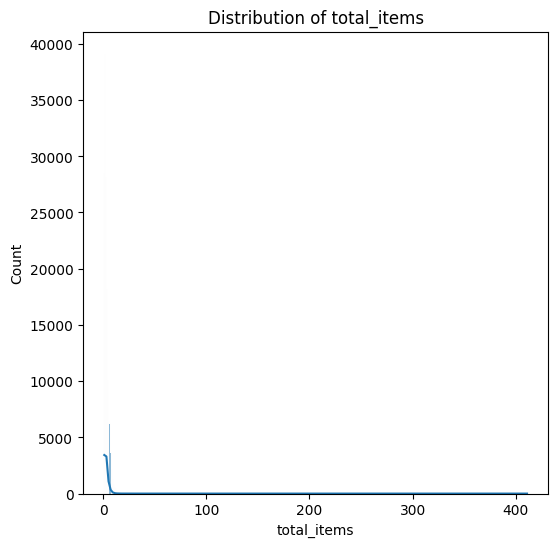

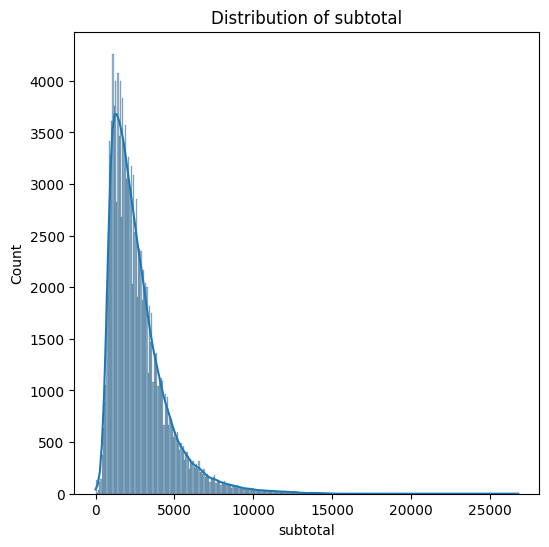

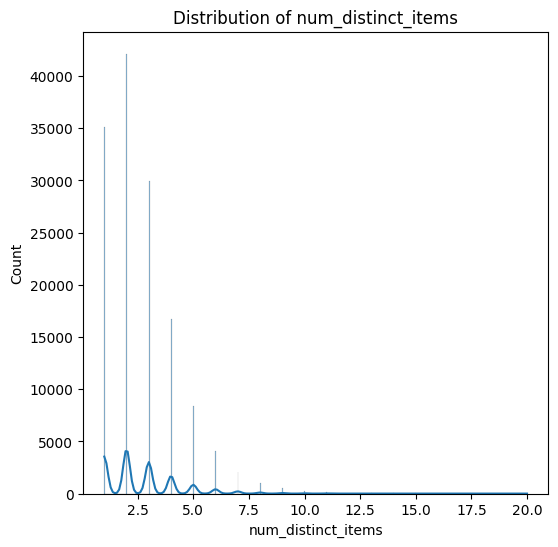

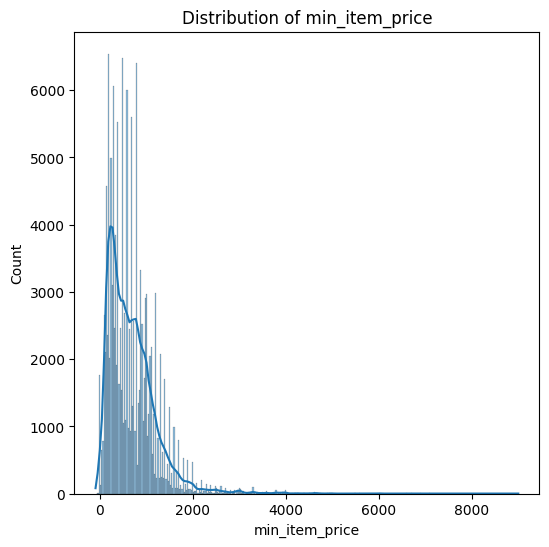

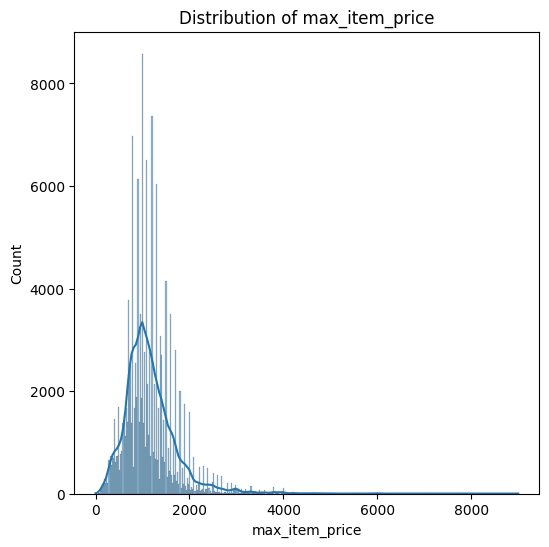

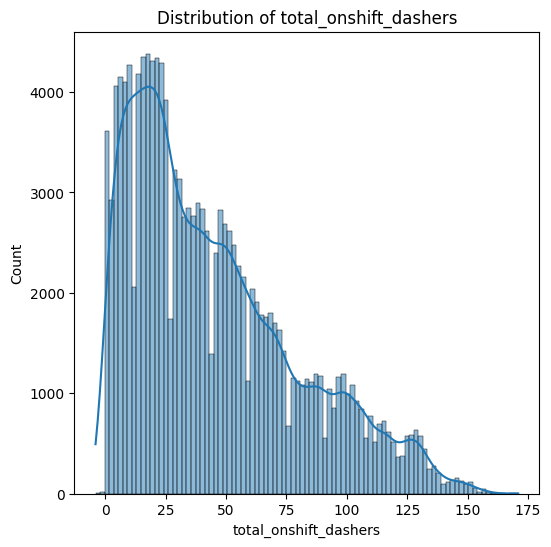

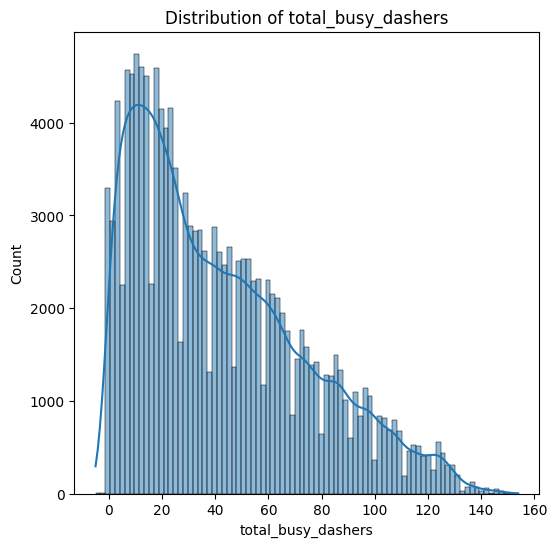

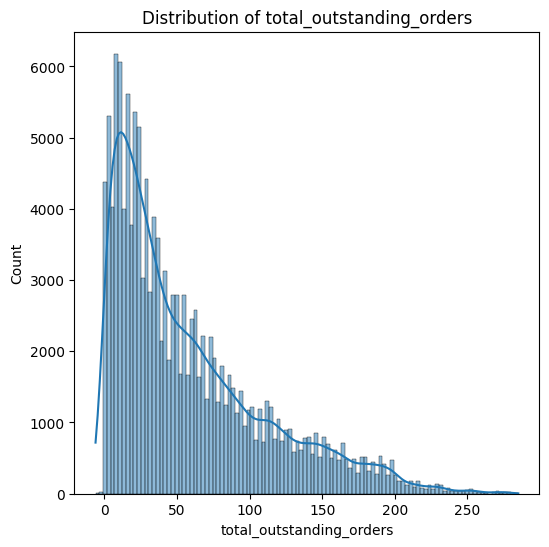

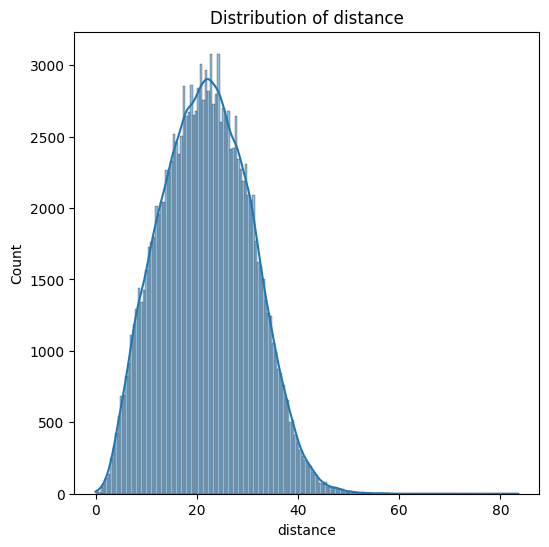

In [68]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 6))
    sns.histplot(x=col, data=X_train, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Distance: The distribution of distance appears less skewed with little skewness towards right side. This suggest that most deliveries seem to be within a certain distance range, with fewer deliveries at much longer distances

# **General Insights from the histplots of all the numerical features**

Most of the numerical features (total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders) show a right-skewed distribution. This can be visualized from the longer tail on the right side of the histograms

Right Skewness of bothe variables (infact most of the variables are right skewed)
For both onshift and busy dashers, it suggests that most of the time, there are a relatively smaller number of dashers available or busy. There are fewer occasions where there is a very large number of dashers on duty or occupied with orders. This could reflect typical operational capacity or demand patterns.
The relationship between onshift and busy dashers can provide insights into the utilization of the available delivery force. For instance, a consistently high number of busy dashers compared to onshift dashers might indicate a need for more dashers during certain periods.

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

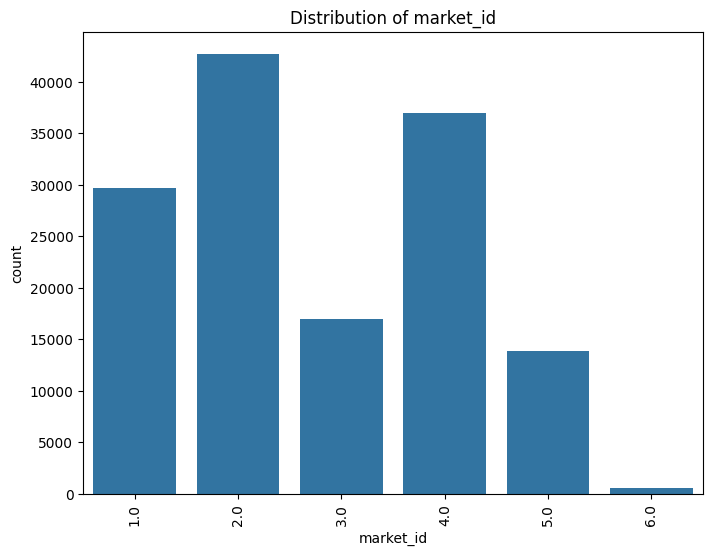

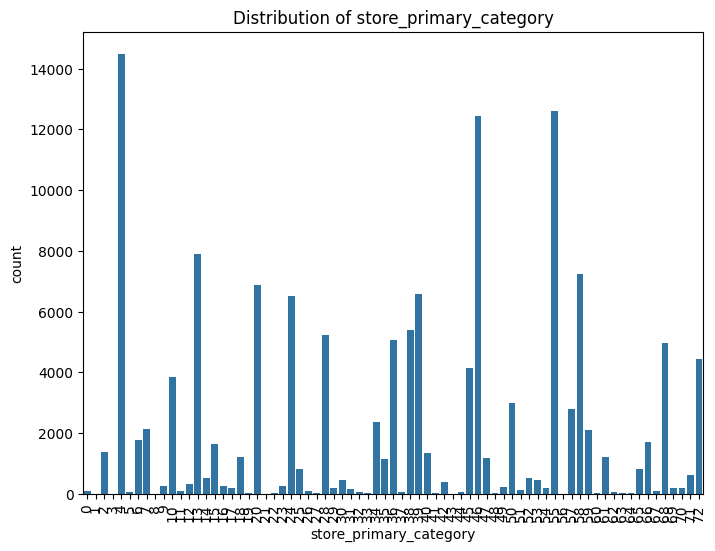

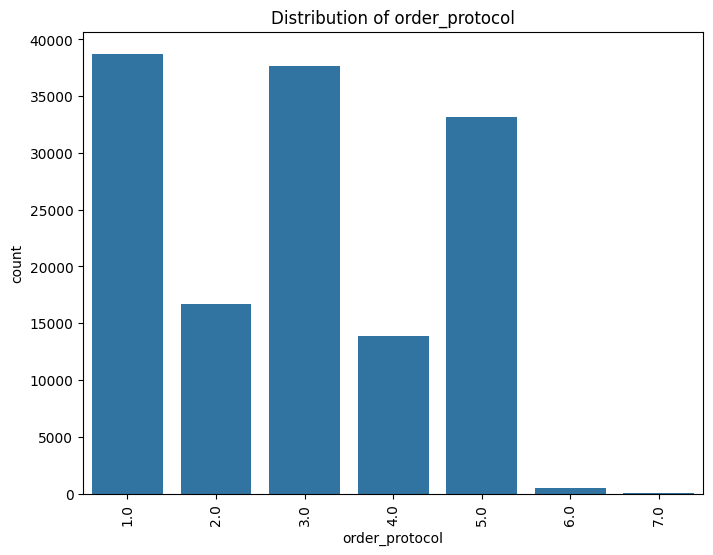

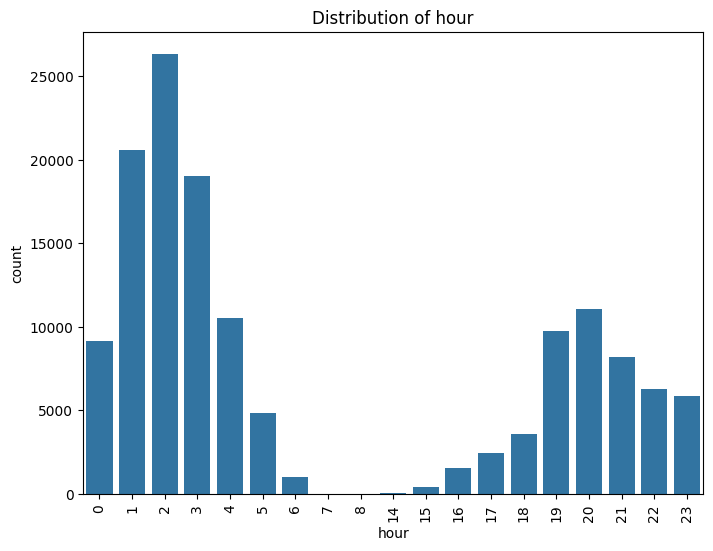

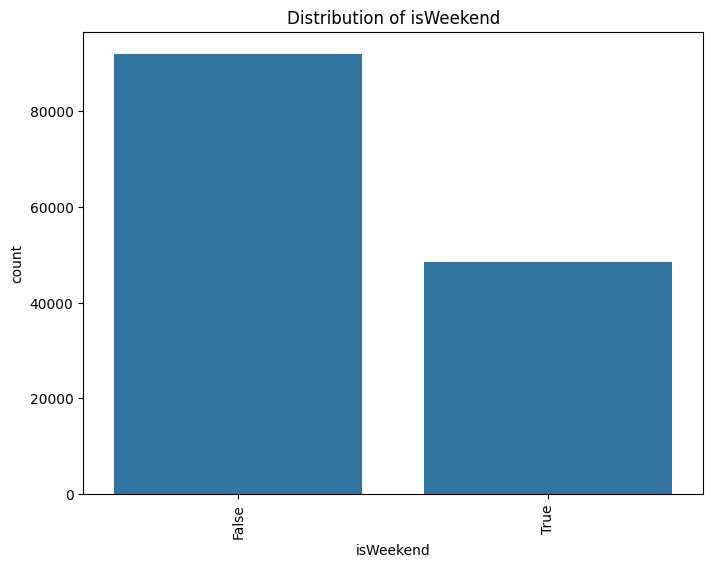

In [69]:
# Distribution of categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=X_train)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.show()

Findings from the analysis of charts for the categorical variables:

1) market_id:The distribution of orders across different markets shows which markets have the highest and lowest number of orders.

2) store_primary_category: This plot reveals the frequency of different restaurant categories. It shows which types of restaurants are most popular on the platform, which can be useful for understanding customer preferences and where more operational focus can be needed.

3) order_protocol: It highlights the most common methods used by customers and guides us of potential strategies for optimizing different order channels.

4) hour:  This helps us identify peak hours for placing orders, which is crucial for resource allocation and understanding demand patterns.

5) isWeekend: The chart tells us the proportion of orders placed on weekends versus weekdays. This ndicates that there's a significant difference in order volume during weekends, and influences staffing and delivery operations.

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

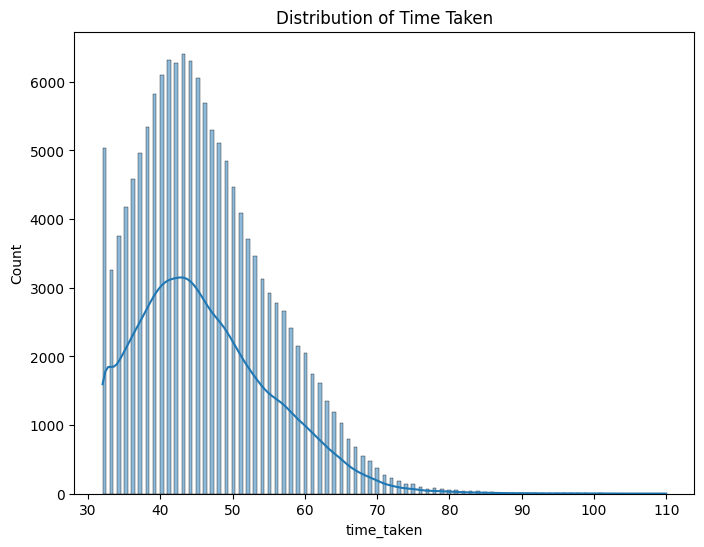

In [70]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken')
plt.show()

time_taken: The plot shows that almost all the deliveries are prompt and fast indicated by the lower end of the time. However, the long tail towards suggests that there are some deliveries that take longer than the average delivery time. These could be due to various factors like traffic, distance, order complexity, or delays at the restaurant. The right tail indicates that there might be some potential outliers too

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

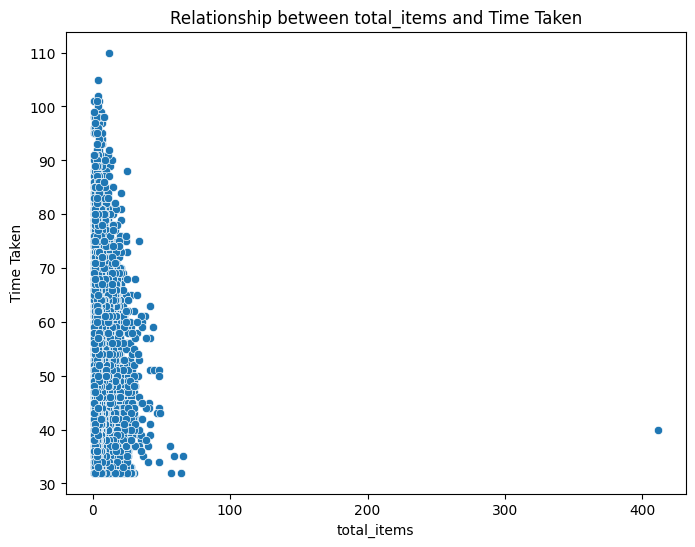

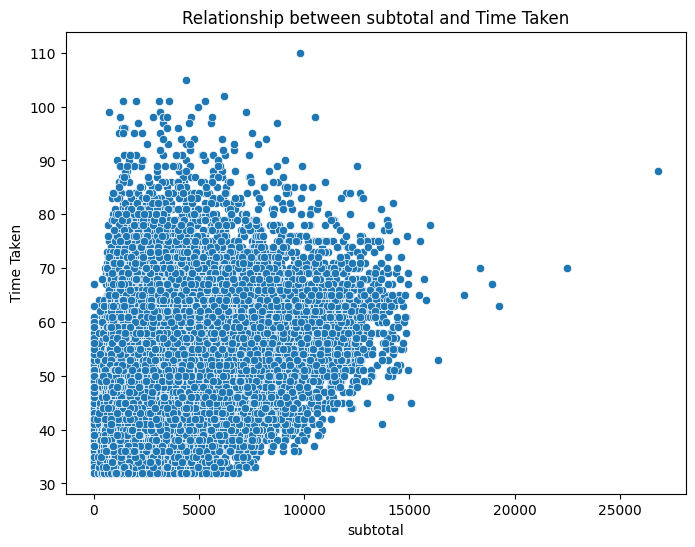

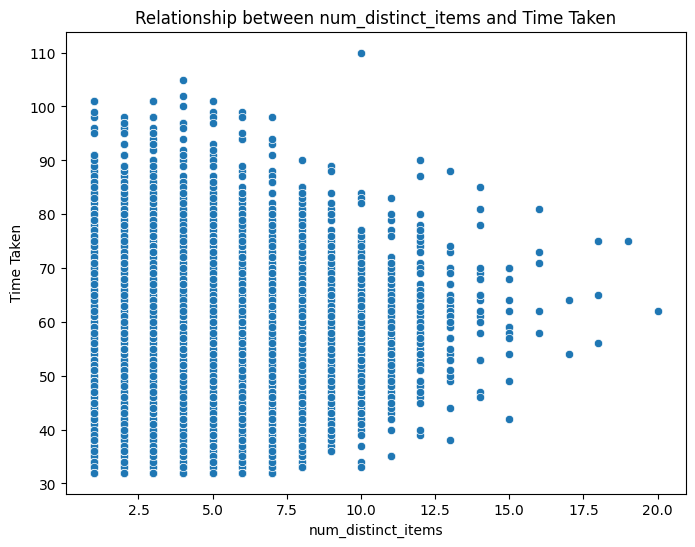

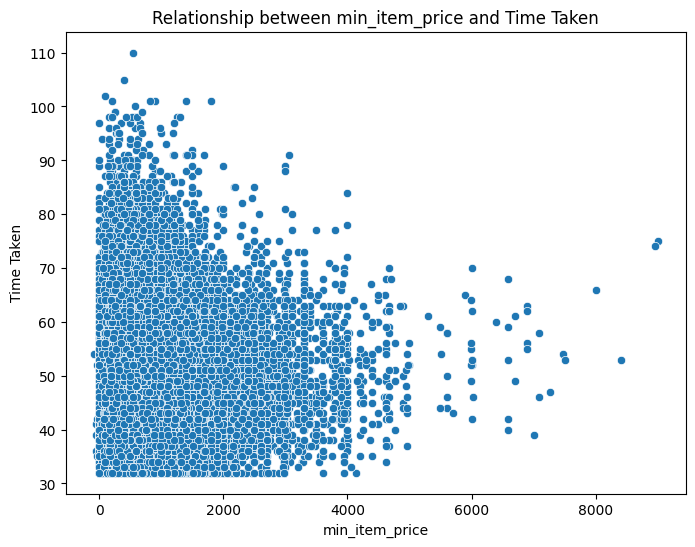

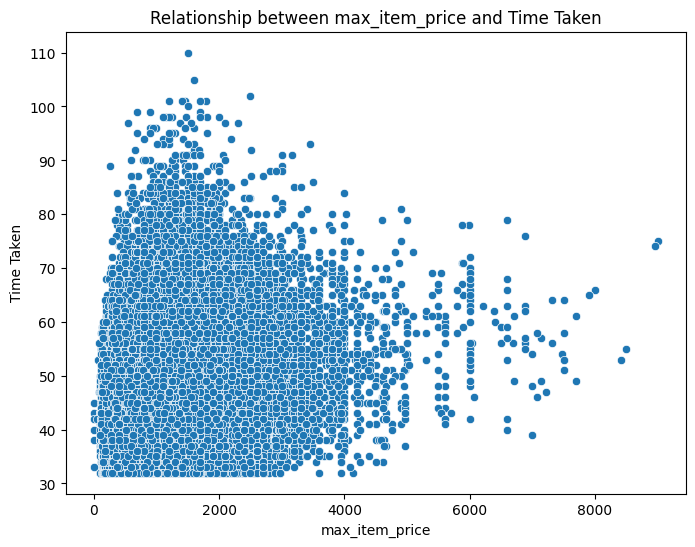

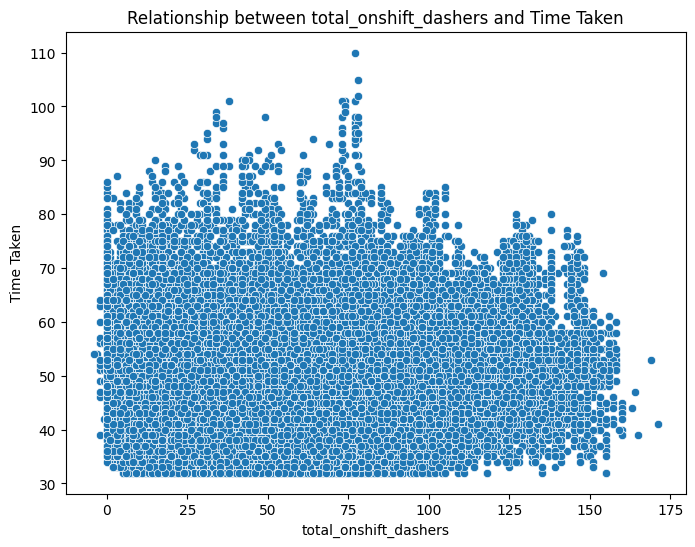

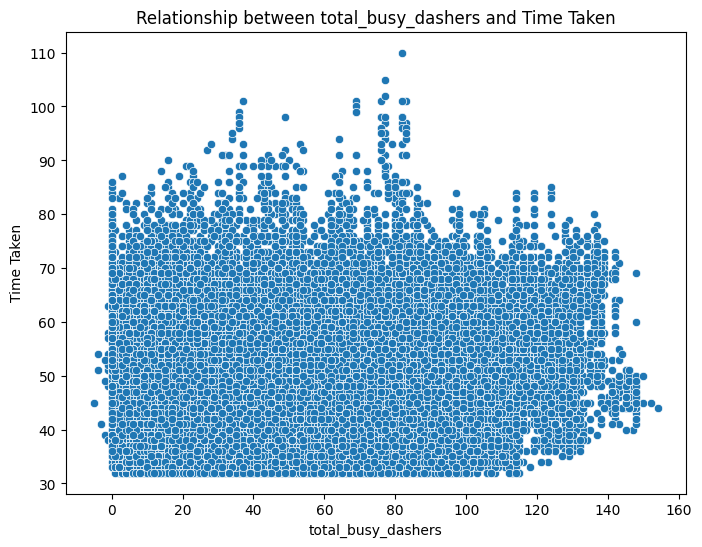

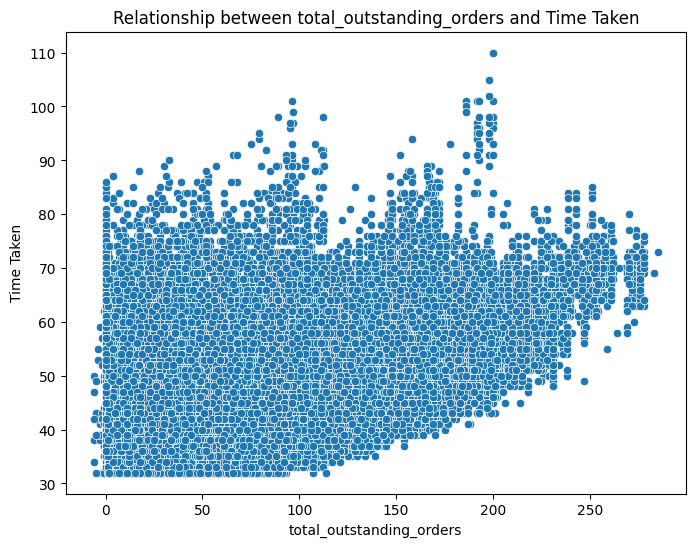

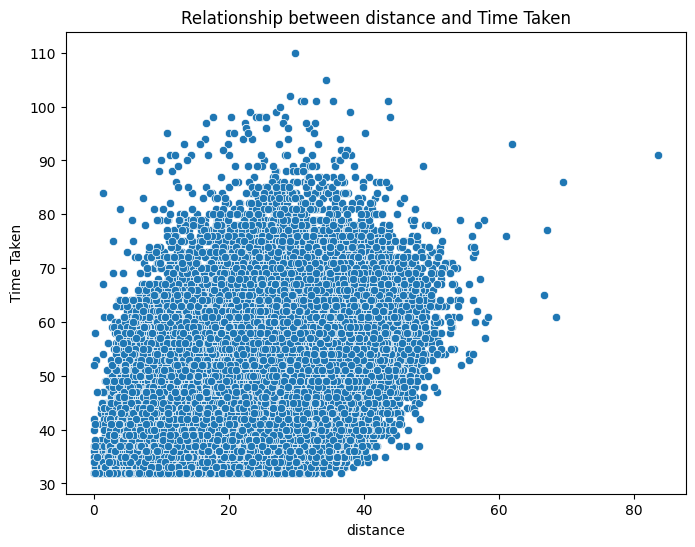

In [71]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Relationship between {col} and Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken')
    plt.show()

The relationship between each numerical feature and time_taken:

total_items, subtotal, num_distinct_items, min_item_price, max_item_price: For these features, the scatter plots generally show a wide spread of time_taken values for most ranges of the feature values. There doesn't appear to be a strong linear relationship.

**total_onshift_dashers, total_busy_dashers, total_outstanding_orders:**

These plots show a decreasing trend w.r.t time_taken as the number of dashers (onshift or busy) or outstanding orders increases, up to a certain point. This points out that–more orders might lead to slightly longer delivery times due to increased activity, but having more dashers could also potentially reduce wait times. The relationship isn't perfectly linear and there's still a lot of variability in time_taken.

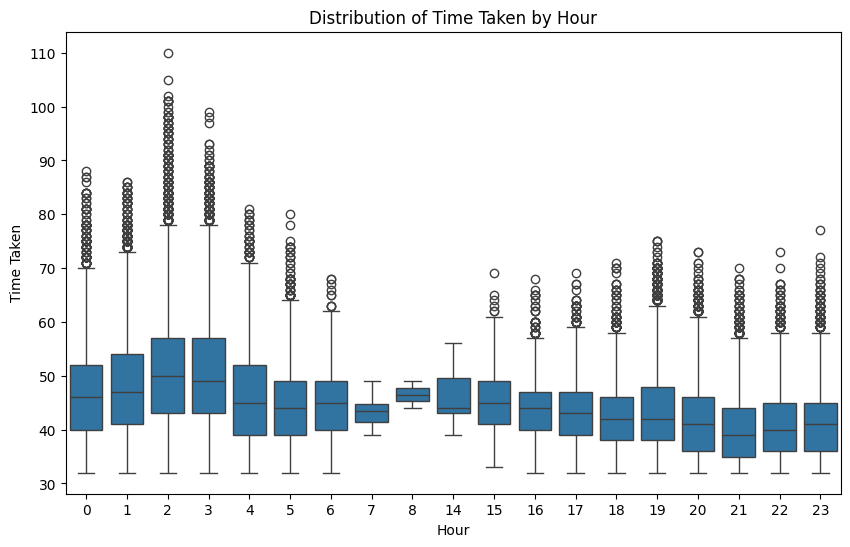

In [72]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['hour'], y=y_train)
plt.title('Distribution of Time Taken by Hour')
plt.xlabel('Hour')
plt.ylabel('Time Taken')
plt.show()

Variation throughout the Day: The median delivery time appears to vary throughout the day.

Peak Hours:hours ranging from 0-4 indicates more variability in delivery times during those hours, which might correspond to peak order times. This is where the box (representing the interquartile range) is wider, and the whiskers are longer. This indicates more variability in delivery times during those hours, which might correspond to peak order times.

Outliers: The points extending beyond the whiskers represent potential outliers, i.e., deliveries that took significantly longer than the majority of deliveries for that hour.

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

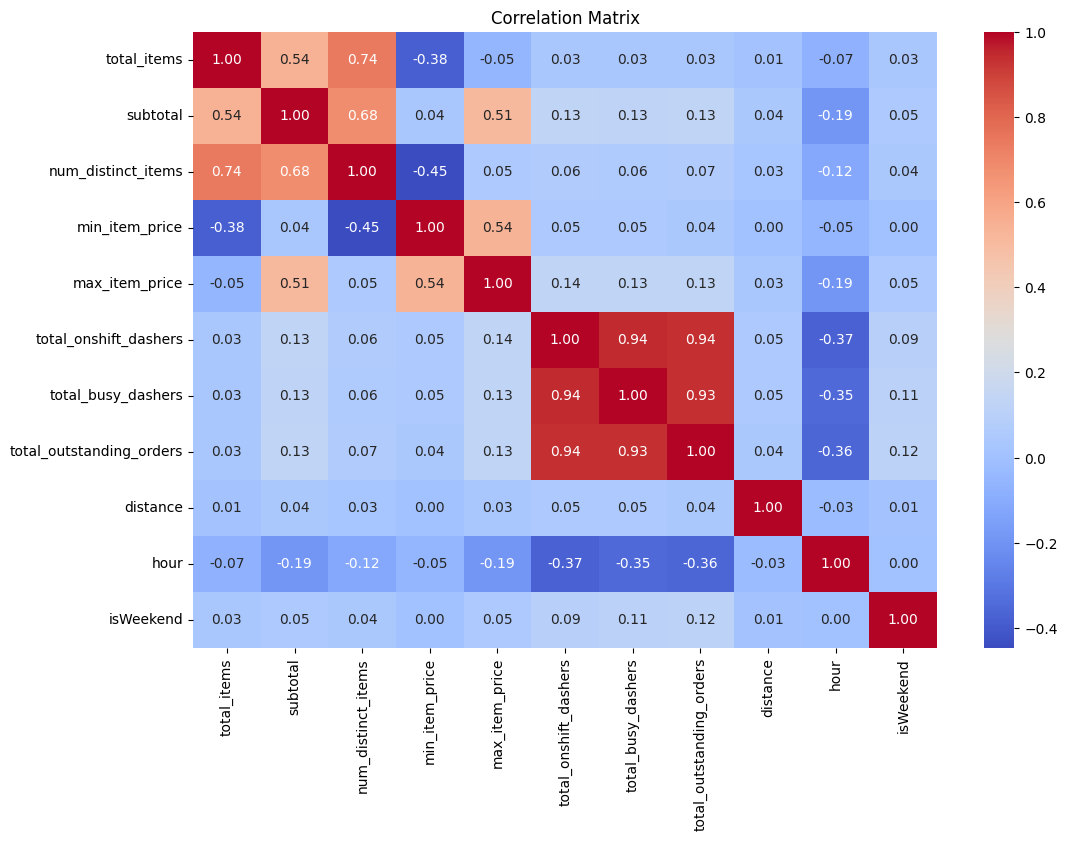

In [73]:
# Visualize the correlation matrix using a heatmap
# This helps to understand the linear relationships between numerical variables.
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlations: There is a strong positive correlation between total_items and subtotal, which means more items usually lead to a higher subtotal.

There is a  correlations between the dasher-related features (total_onshift_dashers, total_busy_dashers, total_outstanding_orders) as they are likely related to each other and the overall demand.

There is also positive realtionship between distance and time_taken as he delivery distance increases, the time taken for delivery tends to increase as well.



##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations along with the target variable 'time_taken'

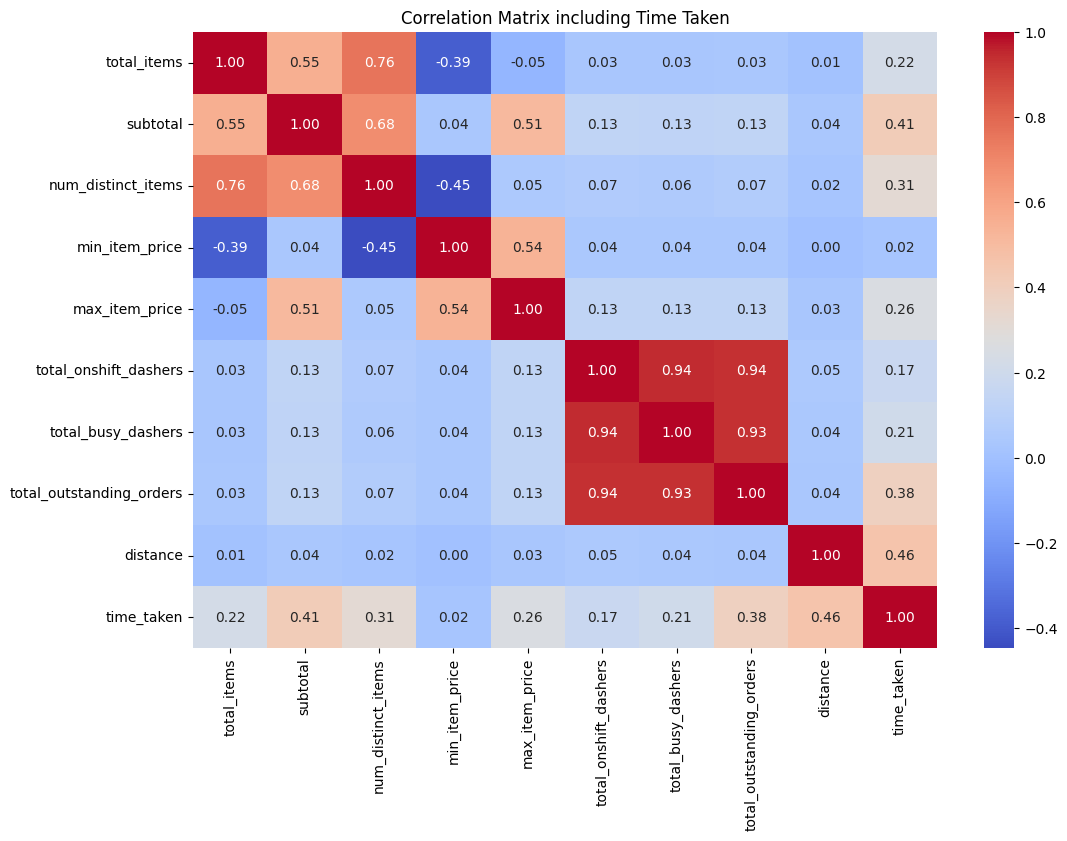

In [74]:
# Include 'time_taken' in the correlation analysis
port_data_corr = port_data.copy()

# only the numerical columns and 'time_taken' for correlation calculation
numerical_and_target_cols = numerical_cols + ['time_taken']
correlation_matrix_with_target = port_data_corr[numerical_and_target_cols].corr()

# Visualize the correlation matrix including time_taken using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix including Time Taken')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [75]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.drop(['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'], axis = 1, inplace = True)
X_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   

        num_distinct_items  min_item_price  max_item_price  distance  hour  \
102712                   1             745             745     30.32    21   
94576                    1             995             995     31.16     2   
49784                    4             150             895     18.16    21   
37753                    2             579            1399     33.44     3   
91728                    1            1320            1320     31.56    21   

        isWeekend  
102712      False  
94576       False  
49784       False  
37753       False  
91728       False

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

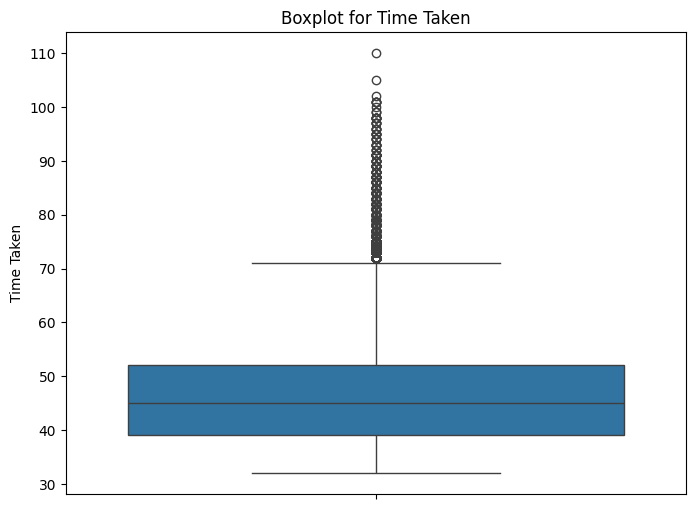

In [76]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_train)
plt.title('Boxplot for Time Taken')
plt.ylabel('Time Taken')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

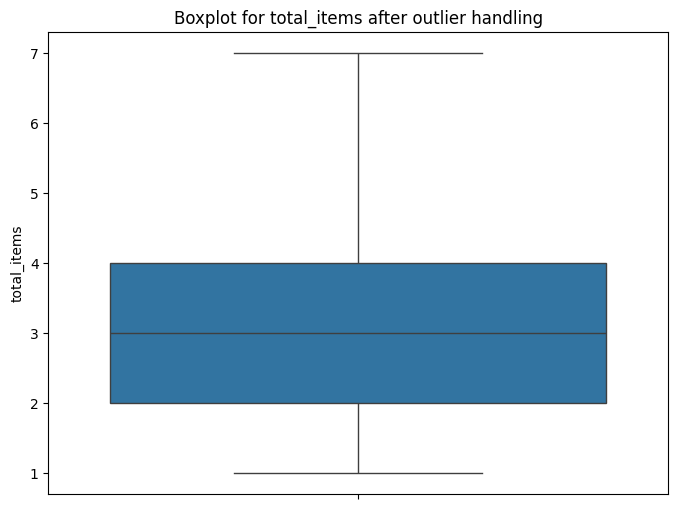

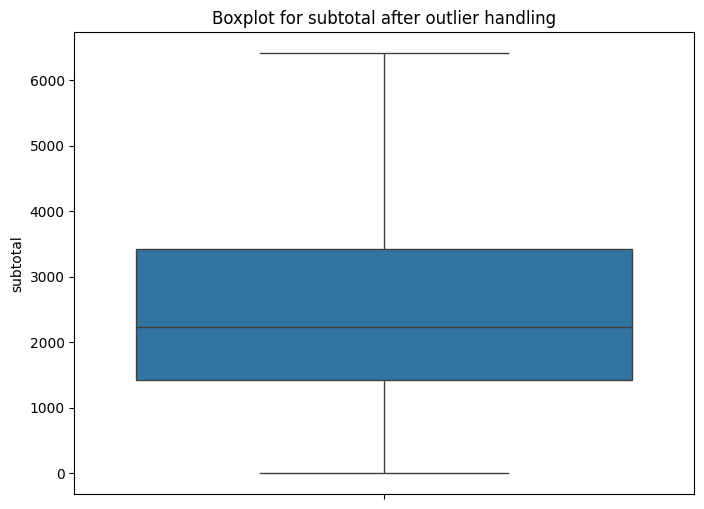

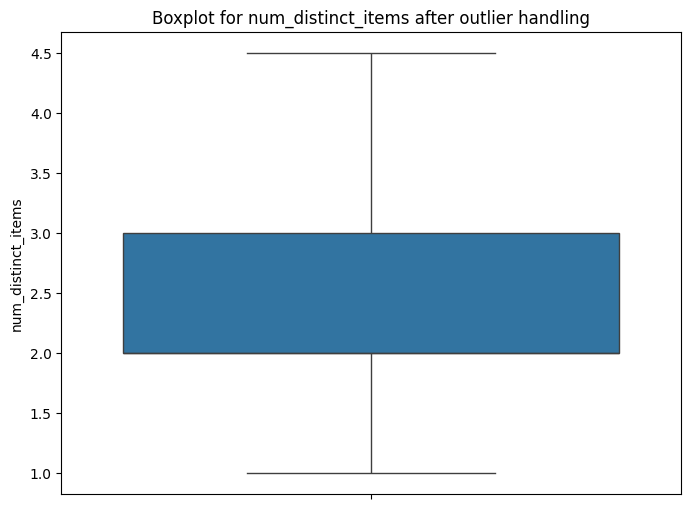

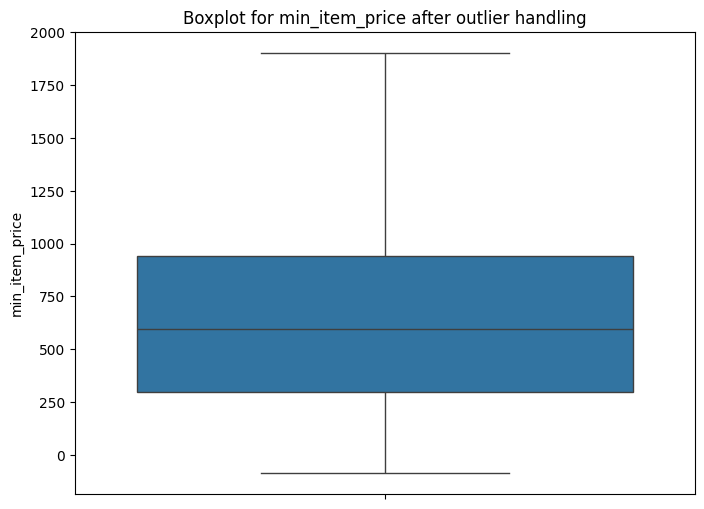

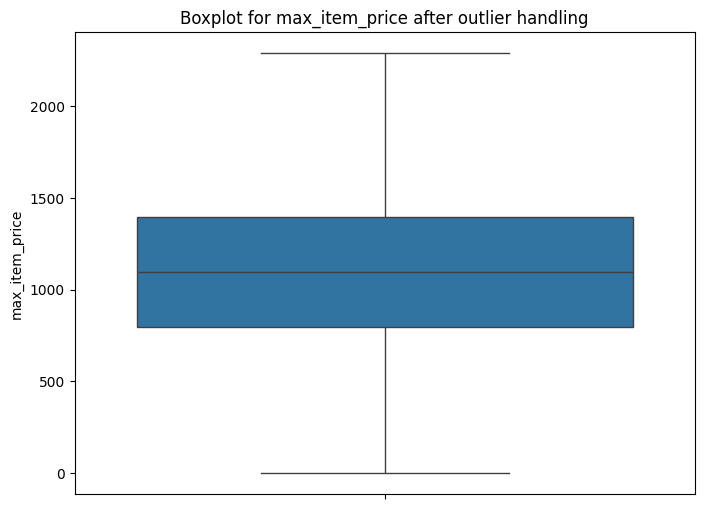

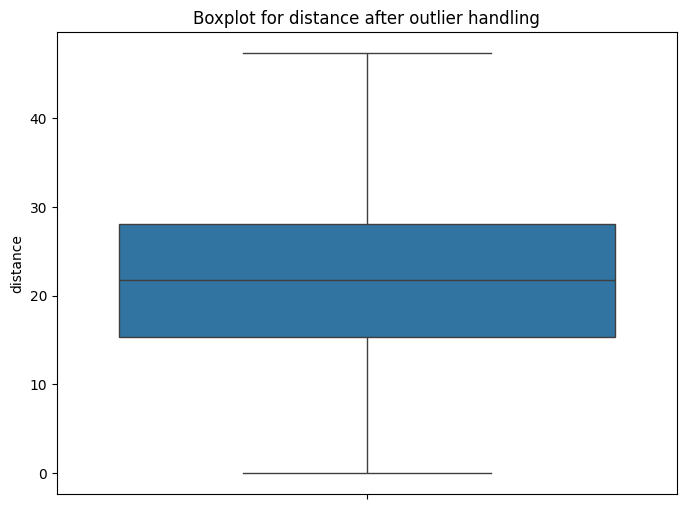

In [77]:
# Handle outliers using the Interquartile Range (IQR) method

# Define numerical columns for outlier handling (excluding the dropped ones)
numerical_cols_updated = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'distance']

for col in numerical_cols_updated:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

# Verify by plotting boxplots after outlier handling (optional)
for col in numerical_cols_updated:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot for {col} after outlier handling')
    plt.ylabel(col)
    plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [78]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'distance'] # Updated based on columns kept
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'isWeekend']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

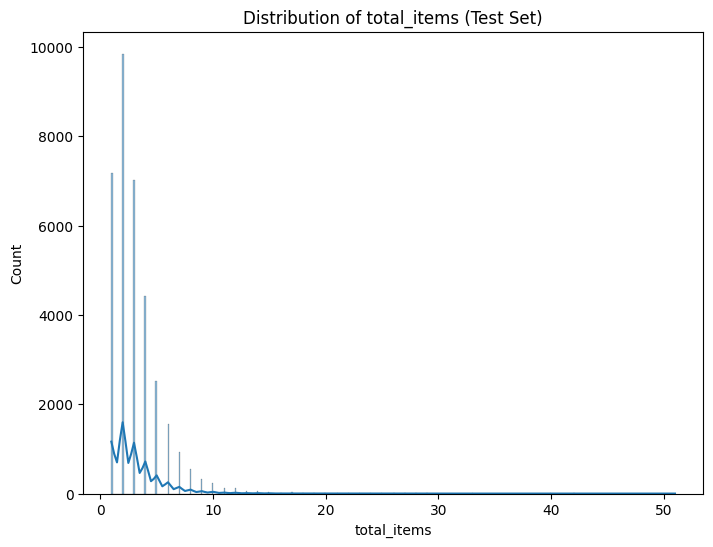

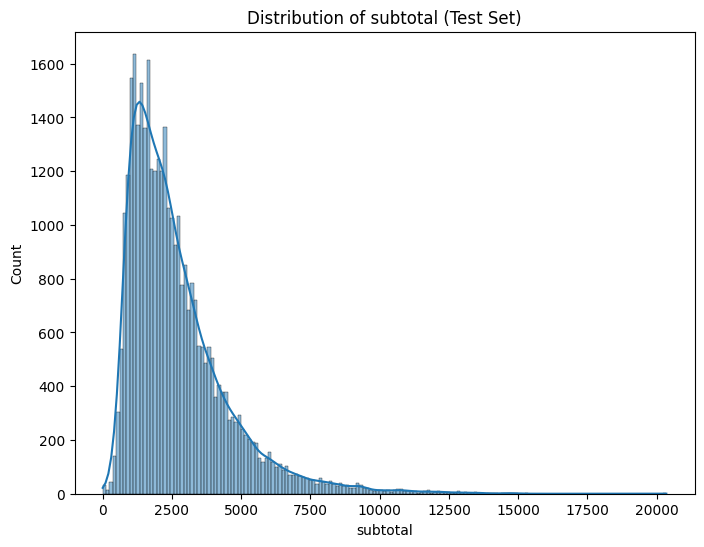

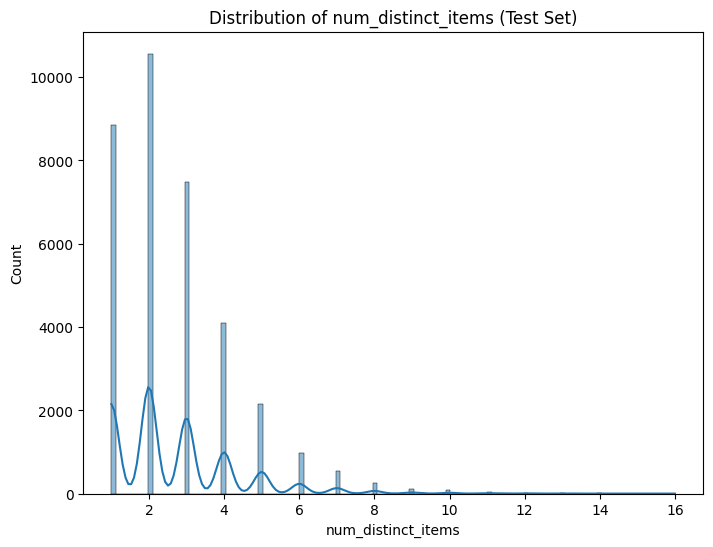

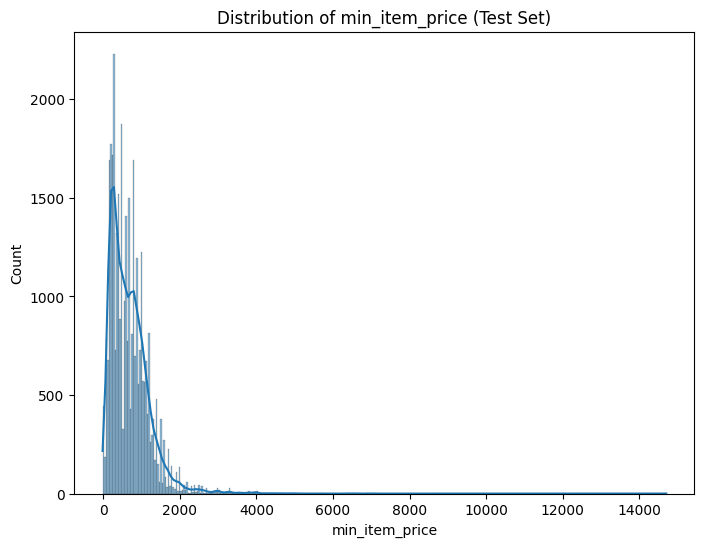

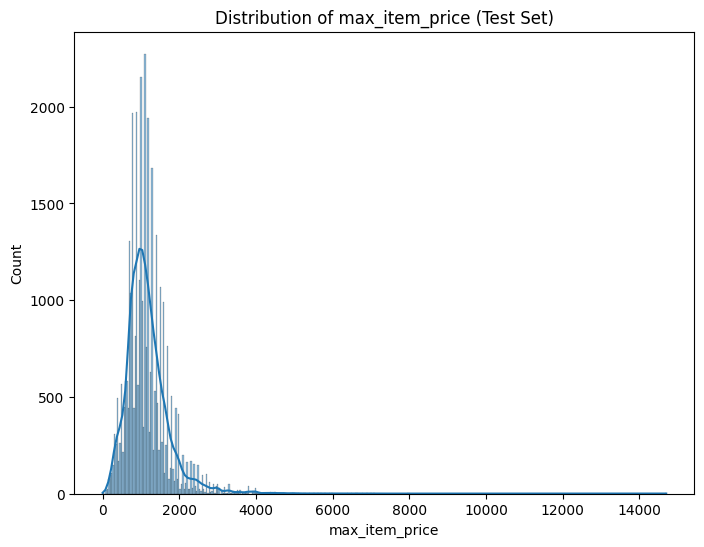

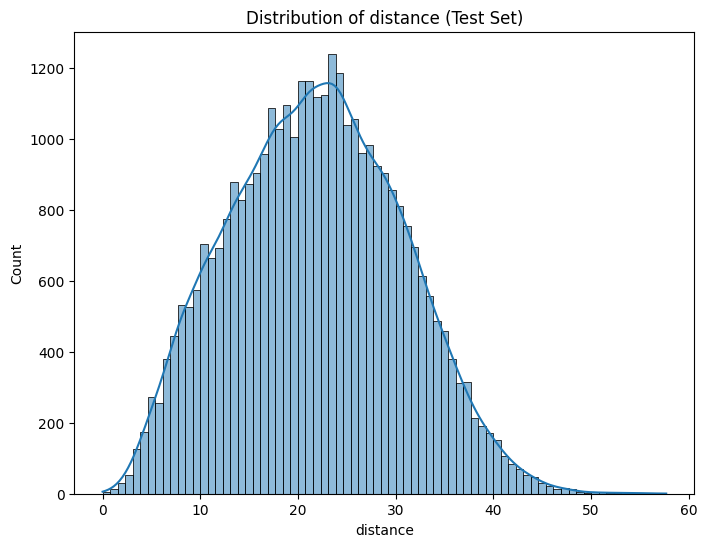

In [79]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=col, data=X_test, kde=True)
    plt.title(f'Distribution of {col} (Test Set)')
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

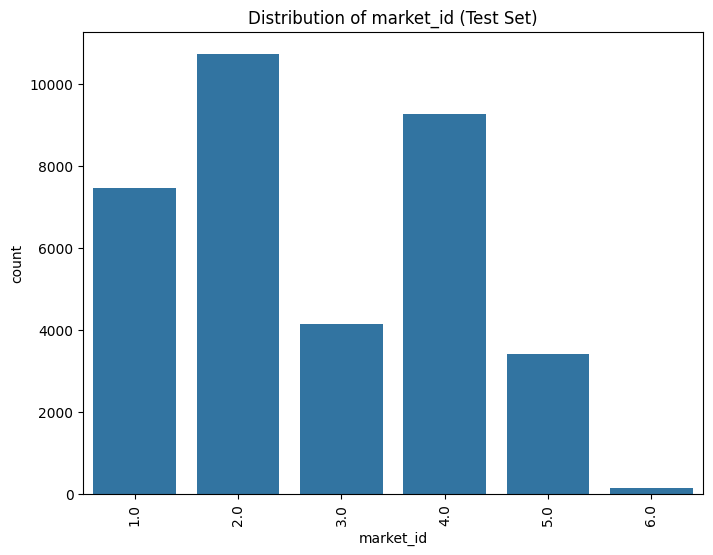

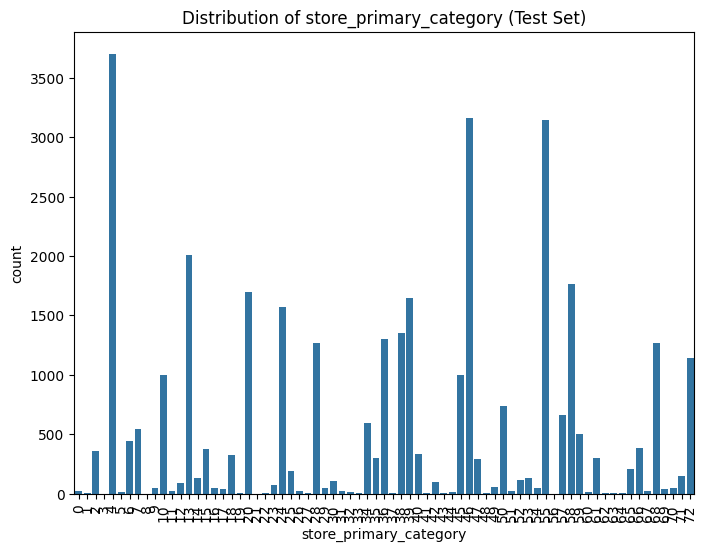

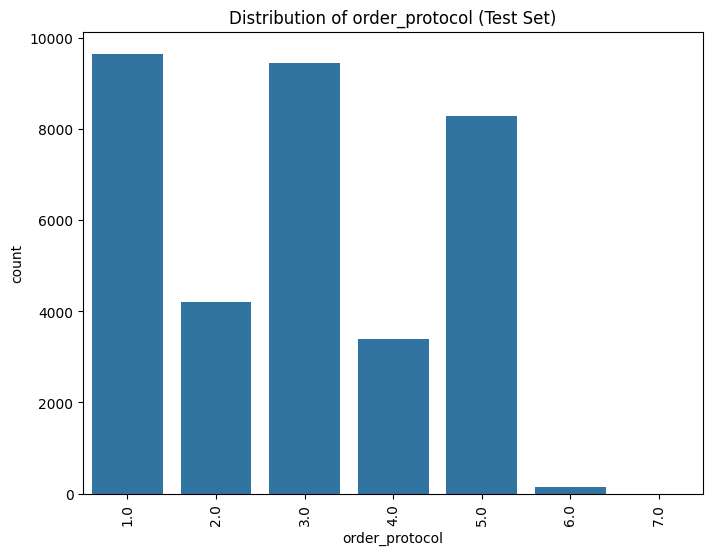

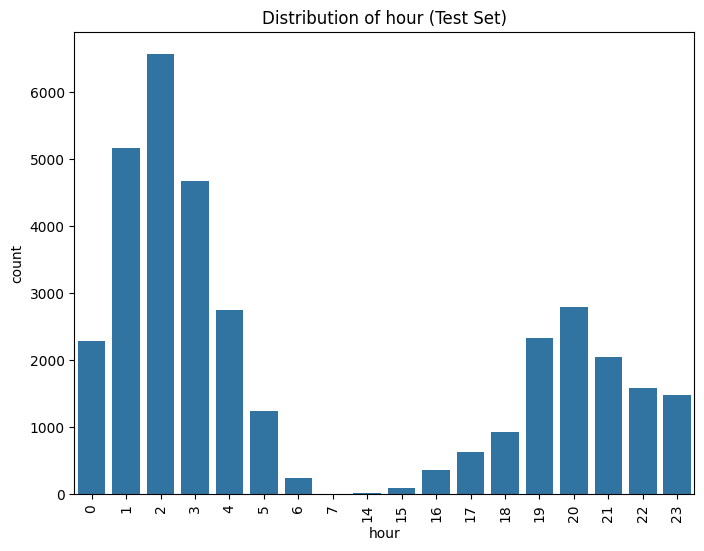

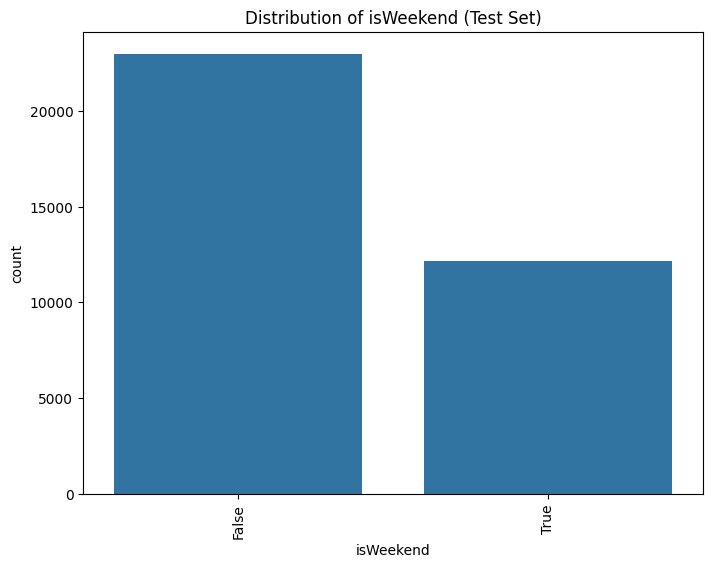

In [80]:
# Distribution of categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=X_test)
    plt.title(f'Distribution of {col} (Test Set)')
    plt.xticks(rotation=90)
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

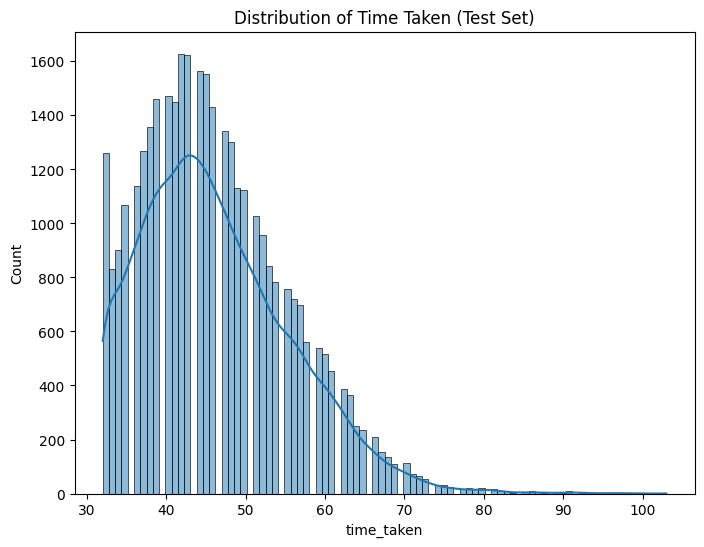

In [81]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True)
plt.title('Distribution of Time Taken (Test Set)')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

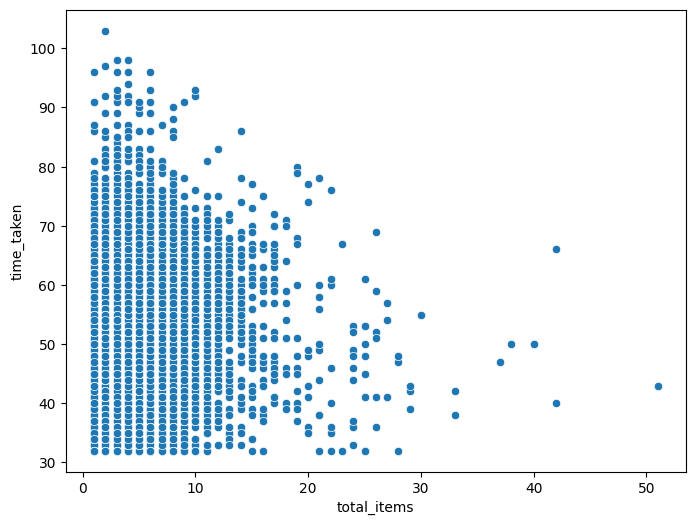

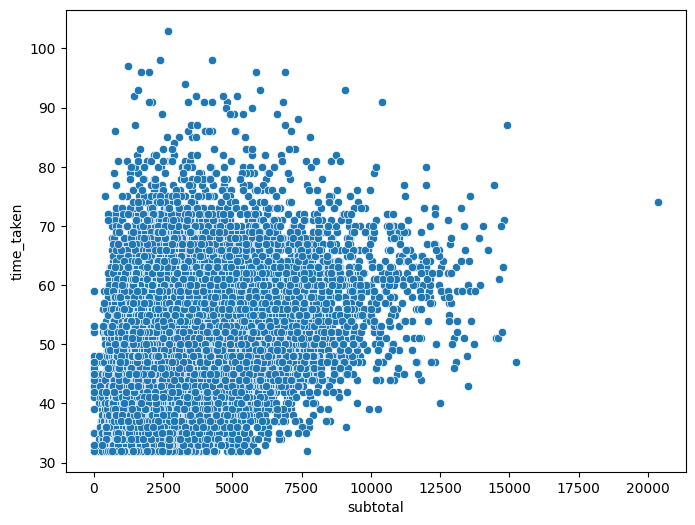

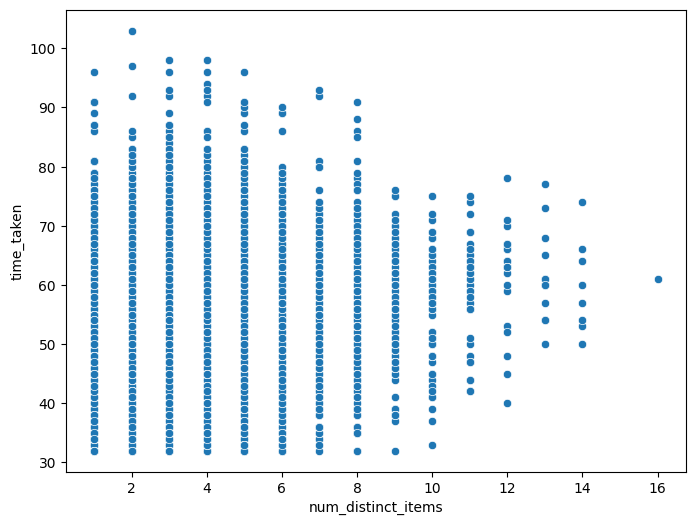

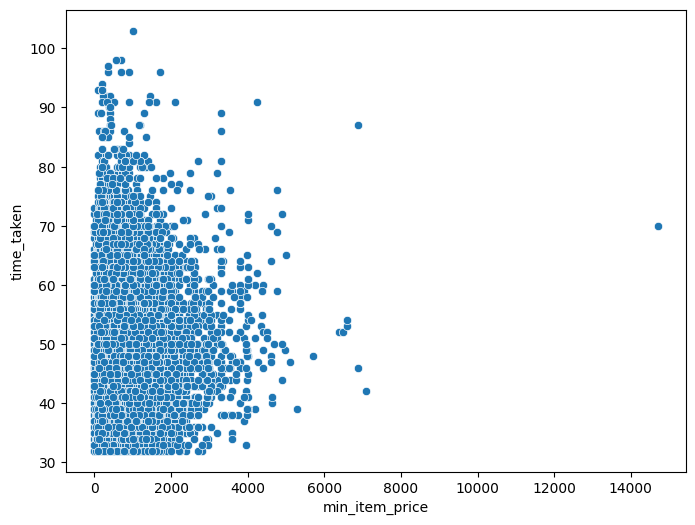

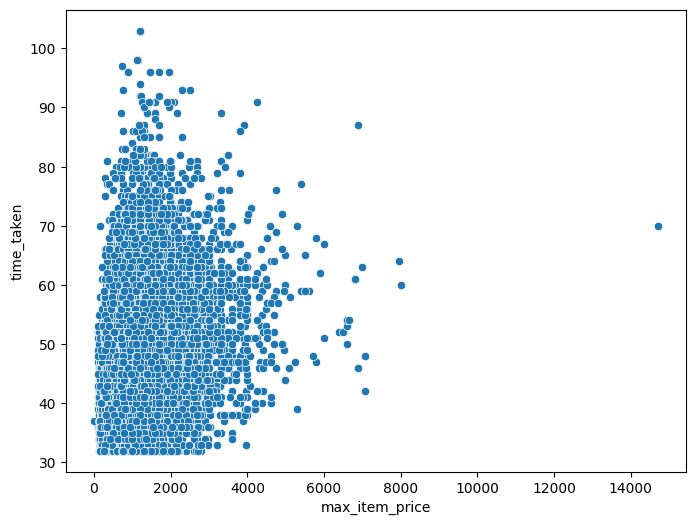

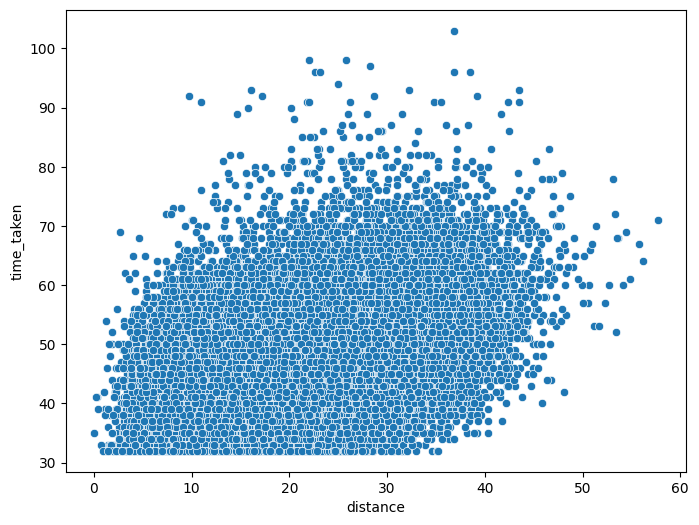

In [82]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[col], y=y_test)



#### **4.3** Drop the columns with weak correlations with the target variable

In [83]:
# Drop the weakly correlated columns from training dataset
X_test.drop(['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'], axis = 1, inplace = True)
X_test.head()




market_id store_primary_category order_protocol  total_items  subtotal  \
50609       1.0                     39            1.0            4      2596   
49181       4.0                     25            3.0            3      3180   
4526        5.0                     46            1.0            1      1199   
131         5.0                     13            4.0            5      1590   
57096       3.0                     58            5.0            6      3680   

       num_distinct_items  min_item_price  max_item_price  distance  hour  \
50609                   4             299            1099     28.32     2   
49181                   2             580            1300     23.56     2   
4526                    1            1199            1199     14.60     5   
131                     4             200             440     25.64    22   
57096                   3             450             750     16.08    19   

       isWeekend  
50609      False  
49181      False  
4526       False  
131        False  
57096       True

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [84]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [85]:
# Apply scaling to the numerical columns
X_train = X_train.copy()
X_test = X_test.copy()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In order to perform analysis using statsmodel we need to perform one hot encoding to make all category/object based features encoded

In [86]:
# Train the model using the training data using scikit-learn
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [88]:
# Find results for evaluation metrics using scikit-learn (or manually)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 46.44571961100135
R-squared (R2): 0.46935723984846867


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [89]:
# Build a linear regression model to use with RFE
model_rfe = LinearRegression()

# Initialize RFE with the linear regression model and the desired number of features
rfe = RFE(model_rfe, n_features_to_select=8)

# Fit RFE to the training data
rfe.fit(X_train, y_train)
# to get the rfe results
rfe_results = pd.DataFrame({'Feature': X_train.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(rfe_results)


# Get the selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

                   Feature  Selected  Ranking
0                market_id      True        1
1   store_primary_category      True        1
2           order_protocol      True        1
3              total_items      True        1
4                 subtotal     False        2
5       num_distinct_items      True        1
6           min_item_price     False        4
7           max_item_price     False        3
8                 distance      True        1
9                     hour      True        1
10               isWeekend      True        1
Selected features by RFE: Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'num_distinct_items', 'distance', 'hour', 'isWeekend'],
      dtype='object')


In [90]:
# Build the final model with selected number of features

final_model = LinearRegression()
final_model.fit(X_train[X_train_scaled.columns[rfe.support_]], y_train)



LinearRegression()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

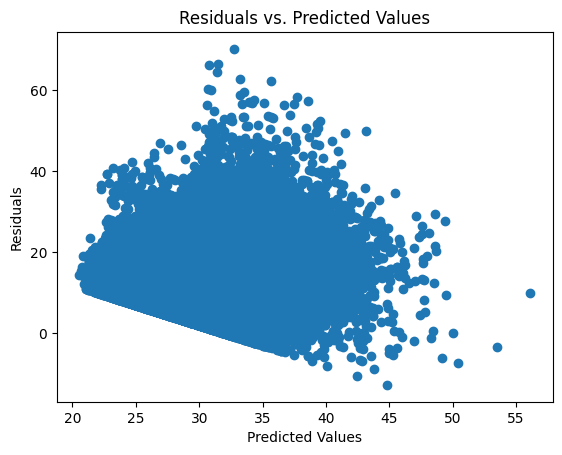

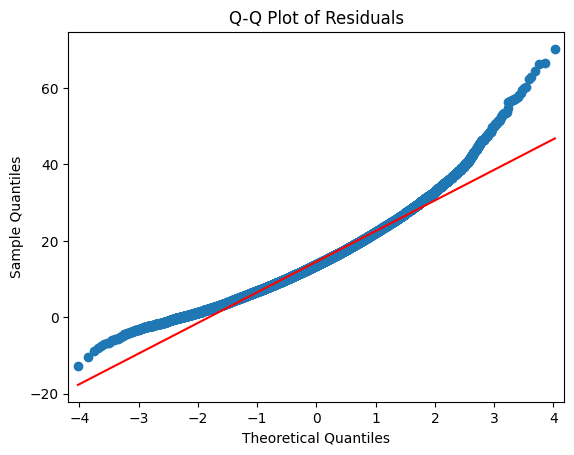

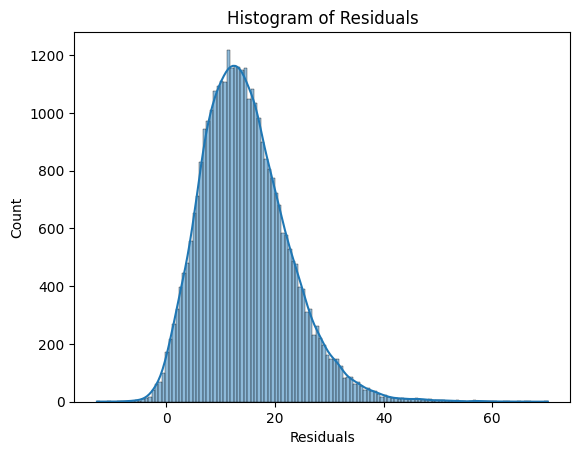

In [91]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Get predictions from the final model on the test set with selected features
y_pred_final = final_model.predict(X_test_scaled[selected_features])

# Find results for evaluation metrics using scikit-learn (or manually)


# Residuals vs. Predicted Values
residuals = y_test - y_pred_final
plt.scatter(y_pred_final, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Residual Histogram
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

 Residuals vs. Predicted Values scatter plot: This plot here indicates that the residuals are heteroscadestic in nature, which means that they are having a non-constant variance around 0. Ideally the variance(dots) in the sactter plot should be around 0. Here in this plot it is taking a funnel shape.
 May be the model is not capturing non-linear relationships well.

 The QQ plot shows that the residuals are deviating a lot from the red line which is depicting an expected normal distribution of the residuals. This strongly suggests that the residuals do not follow a normal distribution.

 Histogram: Peak at 0:

The distribution is centered near zero, which is good—it indicates the model is not systematically biased high or low.






#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [92]:
# Define the features to be used in the model (numerical features + isWeekend)
#features_for_model = numerical_cols + ['isWeekend']


# Select these features from the training and test sets
 #X_train_selected = X_train[features_for_model]
 #X_test_selected = X_test[features_for_model]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


# Train a linear regression model on the selected features (unscaled)
final_model_unscaled = LinearRegression()
final_model_unscaled.fit(X_train, y_train)

# Get the coefficients of the model trained on unscaled data
unscaled_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Unscaled Coefficient': final_model_unscaled.coef_})
print("Unscaled Coefficients:")
display(unscaled_coefficients)

# Now, train a model on the scaled version of these selected features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

final_model_scaled = LinearRegression()
final_model_scaled.fit(X_train_selected_scaled, y_train)

# Get the coefficients of the model trained on scaled data
scaled_coefficients = pd.DataFrame({'Feature': X_train_selected.columns, 'Scaled Coefficient': final_model_scaled.coef_})
print("\nScaled Coefficients:")
display(scaled_coefficients)

Unscaled Coefficients:


Feature  Unscaled Coefficient
0                market_id             -0.609480
1   store_primary_category              0.009097
2           order_protocol             -0.696230
3              total_items              0.178352
4                 subtotal              0.001597
5       num_distinct_items              0.315657
6           min_item_price              0.000171
7           max_item_price              0.000524
8                 distance              0.468782
9                     hour             -0.280322
10               isWeekend              2.178989


Scaled Coefficients:


Feature  Scaled Coefficient
0               market_id           -0.841027
1  store_primary_category            0.307469
2          order_protocol           -1.201067
3             total_items            1.321299
4      num_distinct_items            0.989841
5                distance            4.158060
6                    hour           -2.819370
7               isWeekend            1.122322

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [93]:
# Analyze the effect of a unit change in a feature, say 'distance'

# Get the unscaled coefficient for 'distance'
distance_unscaled_coef = unscaled_coefficients[unscaled_coefficients['Feature'] == 'distance']['Unscaled Coefficient'].iloc[0]

print(f"A one-unit increase in 'distance' is associated with an estimated increase of {distance_unscaled_coef:.4f} minutes in delivery time (holding other features constant).")

# Get the scaled coefficient for 'distance' and the standard deviation of the original 'distance' feature
distance_scaled_coef = scaled_coefficients[scaled_coefficients['Feature'] == 'distance']['Scaled Coefficient'].iloc[0]
distance_std_dev = X_train['distance'].std()

# The unscaled coefficient can also be calculated from the scaled coefficient and the feature's standard deviation
calculated_unscaled_coef = distance_scaled_coef / distance_std_dev

print(f"The unscaled coefficient for 'distance' calculated from the scaled coefficient is {calculated_unscaled_coef:.4f}.")

# We can do the same for other features as well.
# For example, for 'total_items':
total_items_unscaled_coef = unscaled_coefficients[unscaled_coefficients['Feature'] == 'total_items']['Unscaled Coefficient'].iloc[0]
print(f"\nA one-unit increase in 'total_items' is associated with an estimated increase of {total_items_unscaled_coef:.4f} minutes in delivery time (holding other features constant).")

total_items_scaled_coef = scaled_coefficients[scaled_coefficients['Feature'] == 'total_items']['Scaled Coefficient'].iloc[0]
total_items_std_dev = X_train['total_items'].std()
calculated_unscaled_coef_items = total_items_scaled_coef / total_items_std_dev
print(f"The unscaled coefficient for 'total_items' calculated from the scaled coefficient is {calculated_unscaled_coef_items:.4f}.")

A one-unit increase in 'distance' is associated with an estimated increase of 0.4688 minutes in delivery time (holding other features constant).
The unscaled coefficient for 'distance' calculated from the scaled coefficient is 0.4762.

A one-unit increase in 'total_items' is associated with an estimated increase of 0.1784 minutes in delivery time (holding other features constant).
The unscaled coefficient for 'total_items' calculated from the scaled coefficient is 0.7526.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

In [94]:
# Combine scaled and unscaled coefficients for easier comparison
combined_coefficients = pd.merge(unscaled_coefficients, scaled_coefficients, on='Feature', how='inner')
display(combined_coefficients)

Feature  Unscaled Coefficient  Scaled Coefficient
0               market_id             -0.609480           -0.841027
1  store_primary_category              0.009097            0.307469
2          order_protocol             -0.696230           -1.201067
3             total_items              0.178352            1.321299
4      num_distinct_items              0.315657            0.989841
5                distance              0.468782            4.158060
6                    hour             -0.280322           -2.819370
7               isWeekend              2.178989            1.122322

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> understanding and the EDA we performed, the categorical variables are:

market_id,
store_primary_category,
order_protocol,
hour,
day_of_week (from which isWeekend was derived),
From the analysis of the count plots and the boxplot of 'time_taken' by 'hour', we can infer the following effects on the dependent variable ('time_taken'):

market_id: Different markets have varying order volumes, which could potentially influence delivery times due to differences in traffic, or number of available dashers. The distribution plot showed that some markets have significantly more orders than others.

store_primary_category: The type of restaurant can affect preparation time and potentially delivery time. The count plot showed the frequency of different categories, indicating which types of restaurants are more popular and might impact delivery times based on their own operational efficiency.

order_protocol: The way an order is placed might influence the process and thus the delivery time. The count plot showed the distribution of different order protocols.

hour: The boxplot of 'time_taken' by 'hour' clearly showed that delivery times vary significantly throughout the day, with potentially longer and more variable delivery times during peak hours.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size =0.2 indiactes that we split the  data into training and test sets using functions like train_test_split from scikit-learn, test_size = 0.2 refers to the proportion of the dataset that will be allocated to the test set.

It means that 20% of the total data will be used for testing the model, and the remaining 80% will be used for training the model. This split helps in evaluating how well the model generalizes to unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Based on the heatmap, the feature with the highest correlation with the target variable 'time_taken' is 'distance' with a correlation coefficient of approximately 0.46.

This indicates a positive linear relationship which means that as the delivery distance increases, the delivery time tends to increase as well.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
The approach to detect outliers involved visualization and using the Interquartile Range (IQR) method.

Detection: We visualized the outliers using boxplots for the target variable (time_taken) and other numerical features. Boxplots clearly show data points that fall outside the whiskers, which are considered as "outliers".
Addressing:The outliers for numerical columnsare are addressed using the Interquartile Range (IQR) method. For each numerical column, we calculated the first quartile (Q1) and the third quartile (Q3), and then the IQR (Q3 - Q1). The lower bound was defined as
Q1 - 1.5 * IQR,
and the upper bound as Q3 + 1.5 * IQR.
Any data points below the lower bound or above the upper bound are then capped at these respective bounds. This means that outlier values were replaced with the value of the nearest bound, rather than removing the data points entirely.
>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final linear regression model and looking at the scaled coefficients, which indicate the relative importance of each feature, the top 3 features significantly affecting delivery time appear to be:

distance: It has the largest positive scaled coefficient, indicating that delivery distance has the strongest positive impact on delivery time (longer distances lead to longer times).

hour: It has a significant negative scaled coefficient, suggesting that the hour of the day when the order is placed has a strong influence on delivery time (the negative sign might indicate that deliveries are faster during certain hours compared to others, depending on the specific hour ranges).

total_items: It has a positive scaled coefficient which suggests that the order total_items also has a considerable positive impact on delivery time (higher total_items might be associated with more complex or larger orders).
These features have the comparatively high values among the scaled coefficients, implying they have the most significant impact on the predicted delivery time in this model.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Linear regression examines the relationship between one predictor and an outcome variable, while multiple regression delves into how several predictors influence that outcome.

Linear regression is a statistical method used to model the relationship between a dependent variable and one independent variable. It aims to establish a linear relationship between these variables and can be used for both prediction and understanding the nature of the relationship.
Mathematical Equation
The mathematical representation of simple linear regression is:
Y = C0 + C1X + e
where,

Y: Dependent Variable (target variable)
X: Independent Variable (input variable)
C0: Intercept (value of Y when X=0)
C1: Slope of line
e: Error term

Multiple regression is an extension of simple linear regression. It models the relationship between one dependent variable and two or more independent variables. The primary purpose is to understand how the dependent variable changes as the independent variables change.
Mathematical Equation
The mathematical representation of multiple regression is:

Y = C0 + C1X1 + C2X2 + C3X3 + ….. + CnXn + e

where,

Y: Dependent Variable (target variable)
X1, X2, X3,…, Xn: Independent Variable (input variable)
C0: Intercept (value of Y when X=0)
C1, C2, C3, C4, C5, …., Cn: Slope of line
e: Error term

Example of Linear and Multiple Regression
Problem Statement: Suppose we have data for a retail company. The company wants to understand how their advertising expenses in various channels (e.g., TV, Radio) impact sales.

Linear Regression: Predict sales using only TV advertising expenses.
Multiple Regression: Predict sales using both TV and Radio advertising expenses.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function quantifies the difference between predicted values and actual values, indicating how well the model is fitting the data. It's minimized to find the best-fit line or plane that minimizes this difference. This is usually done using techniques like gradient descent.

f(w, b,x)=w*x+b
where: w and b are the adjustable parameters

The goal is to choose the best values for w and b so that the line generated by the model closely matches the training data.
By finding the values of w and b that result in a small cost function, we achieve a model that accurately predicts the target values. Minimizing the cost function involves adjusting the parameters iteratively until convergence, using techniques such as gradient descent.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>***Overfitting*** occurs when a model learns the training data too well, including noise, leading to poor performance on unseen data. Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and testing data.
Overfitting:
**Cause**:
The model learns the training data too closely, including noise and irrelevant details.

**Symptoms**:
High accuracy on the training data, but significantly lower accuracy on the testing data.

**Solution**:
Use more data, simplify the model, apply regularization, use cross-validation, or prevent target leakage.


***Underfitting***:
Cause: The model is too simple to capture the complex relationships in the data.

**Symptoms**: Low accuracy on both training and testing data.

**Solution**: Use more complex models, increase the number of features, or use different algorithms.

**Overfitting**:
The model memorizes the training data, rather than learning the underlying patterns, leading to poor generalization.
**Underfitting**:
The model is too simplistic to capture the patterns in the data, leading to poor performance on both training and test sets.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual = actual y value − predicted y value , r i = y i − y i ^ . Having a negative residual means that the predicted value is too high, similarly if you have a positive residual it means that the predicted value was too low. The aim of a regression line is to minimise the sum of residuals.

In residual plots, if the residuals exhibit a random pattern around the horizontal axis, it indicates that the regression model is appropriate and adequately captures the variability in the data. However, if the residuals show a systematic pattern, such as a curve or funnel shape, it suggests that the regression model may not be the best fit for the data.